In [ ]:
import pandas as pd

df=pd.read_csv("tennis_articles.csv", encoding="latin-1")

In [ ]:
df.head()

,article_id,article_title,article_text,source
0,1,"I do not have friends in tennis, says Maria Sh...",Maria Sharapova has basically no friends as te...,https://www.tennisworldusa.org/tennis/news/Mar...
1,2,Federer defeats Medvedev to advance to 14th Sw...,"BASEL, Switzerland (AP)  Roger Federer advanc...",http://www.tennis.com/pro-game/2018/10/copil-s...
2,3,Tennis: Roger Federer ignored deadline set by ...,Roger Federer has revealed that organisers of ...,https://scroll.in/field/899938/tennis-roger-fe...
3,4,Nishikori to face off against Anderson in Vien...,Kei Nishikori will try to end his long losing ...,http://www.tennis.com/pro-game/2018/10/nishiko...
4,5,Roger Federer has made this huge change to ten...,"Federer, 37, first broke through on tour over ...",https://www.express.co.uk/sport/tennis/1036101...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   article_id     8 non-null      int64 
 1   article_title  8 non-null      object
 2   article_text   8 non-null      object
 3   source         8 non-null      object
dtypes: int64(1), object(3)
memory usage: 388.0+ bytes


In [ ]:
df=df.drop("source",axis=1)

In [ ]:
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import sent_tokenize

sentences = []
for s in df['article_text']:
  sentences.append(sent_tokenize(s))

sentences = [y for x in sentences for y in x] # flatten list

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
print(sentences)

['Maria Sharapova has basically no friends as tennis players on the WTA Tour.', "The Russian player has no problems in openly speaking about it and in a recent interview she said: 'I don't really hide any feelings too much.", 'I think everyone knows this is my job here.', "When I'm on the courts or when I'm on the court playing, I'm a competitor and I want to beat every single person whether they're in the locker room or across the net.", "So I'm not the one to strike up a conversation about the weather and know that in the next few minutes I have to go and try to win a tennis match.", "I'm a pretty competitive girl.", "I say my hellos, but I'm not sending any players flowers as well.", "Uhm, I'm not really friendly or close to many players.", "I have not a lot of friends away from the courts.'", 'When she said she is not really close to a lot of players, is that something strategic that she is doing?', "Is it different on the men's tour than the women's tour?", "'No, not at all.", "I 

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2025-03-14 10:40:21--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-03-14 10:40:21--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-03-14 10:40:21--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
import numpy as np

# Define path to the GloVe file (choose the embedding dimension you want, e.g., 100D)
glove_file = "glove.6B.100d.txt"

# Load GloVe embeddings into a dictionary
glove_embeddings = {}

with open(glove_file, "r", encoding="utf-8") as file:
    for line in file:
        values = line.split()
        word = values[0]  # First item is the word
        vector = np.asarray(values[1:], dtype=np.float32)  # Remaining items are the word vector
        glove_embeddings[word] = vector

print(f"Loaded {len(glove_embeddings)} word vectors.")

Loaded 400000 word vectors.


In [ ]:
import re

def clean_sentences(sentences):
  cleaned_sentences = []
  for sentence in sentences:
    sentence = re.sub(r'[^\w\s]', '', sentence) # Remove punctuation and special characters
    sentence = re.sub(r'\d+', '', sentence) # Remove numbers
    sentence = sentence.lower() # Convert to lowercase
    cleaned_sentences.append(sentence)
  return cleaned_sentences

cleaned_sentences = clean_sentences(sentences)
cleaned_sentences


['maria sharapova has basically no friends as tennis players on the wta tour',
 'the russian player has no problems in openly speaking about it and in a recent interview she said i dont really hide any feelings too much',
 'i think everyone knows this is my job here',
 'when im on the courts or when im on the court playing im a competitor and i want to beat every single person whether theyre in the locker room or across the net',
 'so im not the one to strike up a conversation about the weather and know that in the next few minutes i have to go and try to win a tennis match',
 'im a pretty competitive girl',
 'i say my hellos but im not sending any players flowers as well',
 'uhm im not really friendly or close to many players',
 'i have not a lot of friends away from the courts',
 'when she said she is not really close to a lot of players is that something strategic that she is doing',
 'is it different on the mens tour than the womens tour',
 'no not at all',
 'i think just because y

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

def remove_stopwords(sentences):
    no_stopwords_sentences = []
    for sentence in sentences:
        words = sentence.split()  # Tokenize the sentence into words
        filtered_words = [word for word in words if word not in stop_words]
        no_stopwords_sentences.append(" ".join(filtered_words))  # Reconstruct the sentence without stopwords
    return no_stopwords_sentences


no_stopwords_sentences = remove_stopwords(cleaned_sentences)
no_stopwords_sentences


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['maria sharapova basically friends tennis players wta tour',
 'russian player problems openly speaking recent interview said dont really hide feelings much',
 'think everyone knows job',
 'im courts im court playing im competitor want beat every single person whether theyre locker room across net',
 'im one strike conversation weather know next minutes go try win tennis match',
 'im pretty competitive girl',
 'say hellos im sending players flowers well',
 'uhm im really friendly close many players',
 'lot friends away courts',
 'said really close lot players something strategic',
 'different mens tour womens tour',
 '',
 'think youre sport doesnt mean friends everyone youre categorized youre tennis player youre going get along tennis players',
 'think every person different interests',
 'friends completely different jobs interests ive met different parts life',
 'think everyone thinks tennis players greatest friends',
 'ultimately tennis small part',
 'many things interested',
 'also 

In [ ]:
def vectorize_sentences(sentences, glove_embeddings):
    sentence_vectors = []
    for sentence in sentences:
        words = sentence.split()
        word_vectors = []
        for word in words:
            if word in glove_embeddings:
                word_vectors.append(glove_embeddings[word])
        if word_vectors:
            sentence_vector = np.mean(word_vectors, axis=0)
            sentence_vectors.append(sentence_vector)
        else:
            # Handle cases where no words in the sentence are found in the GloVe embeddings
            sentence_vectors.append(np.zeros(100))  # Or a different default vector
    return np.array(sentence_vectors)

sentence_vectors = vectorize_sentences(no_stopwords_sentences, glove_embeddings)
sentence_vectors


array([[ 0.051489  ,  0.1105585 ,  0.6950863 , ..., -0.05042002,
         0.35223201,  0.54201001],
       [-0.07791846,  0.19516078,  0.41307408, ..., -0.19462514,
         0.19598576,  0.32164767],
       [ 0.14818695,  0.4246085 ,  0.66047901, ...,  0.0646125 ,
         0.20002575,  0.70667005],
       ...,
       [-0.06439372,  0.10801664,  0.50397158, ..., -0.07421169,
         0.1310616 ,  0.01610073],
       [ 0.13112681,  0.2245487 ,  0.37731498, ..., -0.18611076,
        -0.03598849,  0.1339061 ],
       [ 0.10721701, -0.02397834, -0.00825433, ...,  0.204808  ,
        -0.06878334,  0.083253  ]])

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarities = cosine_similarity(sentence_vectors)

cosine_similarities


array([[1.        , 0.6426971 , 0.59156992, ..., 0.83326989, 0.67561617,
        0.56470363],
       [0.6426971 , 1.        , 0.85573618, ..., 0.72950414, 0.83842342,
        0.71960634],
       [0.59156992, 0.85573618, 1.        , ..., 0.67785678, 0.83229937,
        0.6637378 ],
       ...,
       [0.83326989, 0.72950414, 0.67785678, ..., 1.        , 0.75659271,
        0.64456645],
       [0.67561617, 0.83842342, 0.83229937, ..., 0.75659271, 1.        ,
        0.74560147],
       [0.56470363, 0.71960634, 0.6637378 , ..., 0.64456645, 0.74560147,
        1.        ]])

In [ ]:
similarity_matrix = pd.DataFrame(cosine_similarities)
similarity_matrix


,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,128,129
0,1.000000,0.642697,0.591570,0.726268,0.772794,0.659803,0.657144,0.720573,0.685422,0.647395,...,0.683649,0.756269,0.655674,0.644660,0.577962,0.662576,0.489805,0.833270,0.675616,0.564704
1,0.642697,1.000000,0.855736,0.813412,0.830143,0.674890,0.804851,0.829982,0.810703,0.911276,...,0.854126,0.749564,0.756759,0.909717,0.796951,0.851257,0.816023,0.729504,0.838423,0.719606
2,0.591570,0.855736,1.000000,0.789130,0.797251,0.702327,0.724386,0.772859,0.800836,0.893341,...,0.829601,0.699838,0.650575,0.893601,0.730206,0.874877,0.782797,0.677857,0.832299,0.663738
3,0.726268,0.813412,0.789130,1.000000,0.887827,0.816139,0.830462,0.849207,0.844026,0.830503,...,0.836076,0.773964,0.735556,0.822710,0.677139,0.839059,0.720805,0.788315,0.791860,0.707945
4,0.772794,0.830143,0.797251,0.887827,1.000000,0.713493,0.804396,0.854391,0.827298,0.864757,...,0.862621,0.854639,0.815289,0.851383,0.774661,0.860650,0.776312,0.867232,0.812323,0.770105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,0.662576,0.851257,0.874877,0.839059,0.860650,0.724307,0.803019,0.835149,0.840631,0.880189,...,0.853704,0.811872,0.750223,0.890990,0.777670,1.000000,0.778274,0.757567,0.877516,0.733093
126,0.489805,0.816023,0.782797,0.720805,0.776312,0.535816,0.693439,0.702828,0.694387,0.833177,...,0.759996,0.674794,0.718126,0.855265,0.814068,0.778274,1.000000,0.671272,0.777220,0.620571
127,0.833270,0.729504,0.677857,0.788315,0.867232,0.665061,0.720672,0.759120,0.688340,0.750565,...,0.776458,0.843877,0.761210,0.740531,0.713045,0.757567,0.671272,1.000000,0.756593,0.644566
128,0.675616,0.838423,0.832299,0.791860,0.812323,0.705483,0.761250,0.784915,0.783347,0.838971,...,0.837715,0.825588,0.717602,0.880047,0.833892,0.877516,0.777220,0.756593,1.000000,0.745601


Number of nodes: 129
Number of edges: 7770


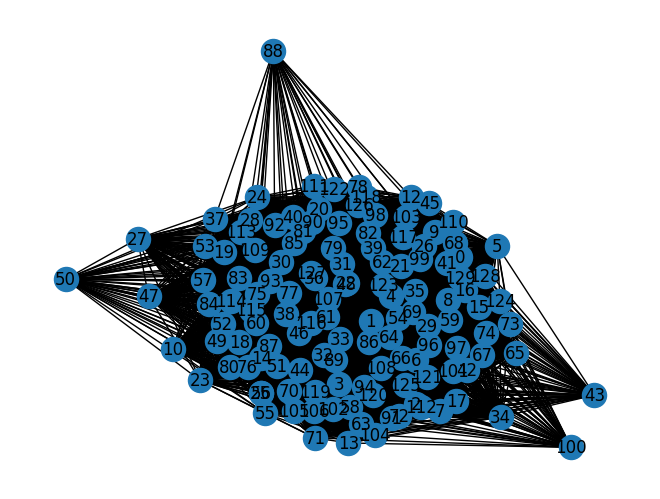

In [ ]:
import networkx as nx

graph = nx.Graph()

# Iterate through the similarity matrix and add edges to the graph
threshold = 0.5  # Set a threshold for similarity to consider an edge
for i in range(len(similarity_matrix)):
    for j in range(i + 1, len(similarity_matrix)):
        if similarity_matrix.iloc[i, j] >= threshold:
            graph.add_edge(i, j, weight=similarity_matrix.iloc[i, j])

nx.draw(graph, with_labels=True)
print("Number of nodes:", graph.number_of_nodes())
print("Number of edges:", graph.number_of_edges())

In [ ]:
pagerank_scores = nx.pagerank(graph)

node_ids = list(graph.nodes())

ranked_sentences = sorted(((pagerank_scores[node_id], no_stopwords_sentences[node_id])
                           for node_id in node_ids),
                          reverse=True)

N = 5
print(f"\nTop {N} Ranked Sentences:")
for score, sentence in ranked_sentences[:N]:
    print(f"Score: {score:.4f}, Sentence: {sentence}")


Top 5 Ranked Sentences:
Score: 0.0089, Sentence: nice trajectorythen reid recalledif hadnt got sick think could started pushing towards second week slams knows duringa comeback attempt five years later reid added bernard tomic us open federer slayer john millman list career scalps
Score: 0.0088, Sentence: im one strike conversation weather know next minutes go try win tennis match
Score: 0.0088, Sentence: felt like best weeks get know players playing fed cup weeks olympic weeks necessarily tournaments
Score: 0.0088, Sentence: felt like really kind changed people little bit definitely lot quiet started become better meanwhile federer hoping improve service game hunts ninth swiss indoors title week
Score: 0.0088, Sentence: major players feel big event late november combined one january australian open mean much tennis little rest
